# 접기

In [1]:
import pandas as pd
from hanspell import spell_checker
import re
import datetime
from datetime import timedelta
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [4]:
hotel_lst = pd.read_csv('C:/Users/user/Desktop/Project/Final/hotelsfinal/사이트_링크_총합_최종.csv')
hotel_lst#.drop(columns=['Unnamed: 0'],inplace=True)

,ht_id,ht_name,bk_url,ya_url,good_url
0,1,24게스트하우스서울시청점,-,https://place-site.yanolja.com/places/1000108609,https://www.goodchoice.kr/product/detail?ano=5...
1,2,57명동호스텔,https://www.booking.com/hotel/kr/philstay-myeo...,https://place-site.yanolja.com/places/3009984,https://www.goodchoice.kr/product/detail?ano=4...
2,3,AC호텔바이메리어트서울강남,https://www.booking.com/hotel/kr/mercure-ambas...,-,https://www.goodchoice.kr/product/detail?ano=7...
3,4,BB홍대호스텔,https://www.booking.com/hotel/kr/kw-hongdae-li...,https://place-site.yanolja.com/places/1000105762,https://www.goodchoice.kr/product/detail?ano=6...
4,5,D.H네상스호텔,https://www.booking.com/hotel/kr/dh-renaissanc...,-,https://www.goodchoice.kr/product/detail?ano=1...
...,...,...,...,...,...
381,382,화곡블루힐,-,https://place-site.yanolja.com/places/23585,https://www.goodchoice.kr/product/detail?ano=4...
382,383,화곡소설스미스,-,-,https://www.goodchoice.kr/product/detail?ano=6...
383,384,화곡해담채,-,https://place-site.yanolja.com/places/3008687,https://www.goodchoice.kr/product/detail?ano=6...
384,385,화웬하우스hq,https://www.booking.com/hotel/kr/huayuanhouseh...,-,-


In [2]:
import os
file_list = os.listdir('C:/Users/user/Desktop/Project/Final/hotelsfinal/서울_야놀자')
file = pd.DataFrame({'file_name':file_list})
file['file_name'] = file['file_name'].str.replace('.csv','')
file

,file_name
0,24게스트하우스서울시청점
1,57명동호스텔
2,BB홍대호스텔
3,ENA스위트호텔남대문
4,G2호텔명동
...,...
314,홍대써니힐게스트하우스
315,화곡VOLL
316,화곡블루힐
317,화곡해담채


In [7]:
inlist = pd.merge(hotel_lst,file,how='inner',left_on='ht_name',right_on='file_name')

In [8]:
inlist

,ht_id,ht_name,file_name
0,1,24게스트하우스서울시청점,24게스트하우스서울시청점
1,2,57명동호스텔,57명동호스텔
2,4,BB홍대호스텔,BB홍대호스텔
3,7,ENA스위트호텔남대문,ENA스위트호텔남대문
4,8,G2호텔명동,G2호텔명동
...,...,...,...
311,379,홍대써니힐게스트하우스,홍대써니힐게스트하우스
312,382,화곡VOLL,화곡VOLL
313,383,화곡블루힐,화곡블루힐
314,385,화곡해담채,화곡해담채


In [9]:
import yanolja_preprocess 
import importlib
importlib.reload(yanolja_preprocess)

<module 'yanolja_preprocess' from 'c:\\Users\\user\\Desktop\\Project\\Final\\nlp\\yanolja_preprocess.py'>

In [11]:
name_lst = inlist['ht_name']
id_lst = inlist['ht_id']

In [19]:
hotel_lst[hotel_lst['ht_name']=='역삼벤']

,ht_id,ht_name
205,206,역삼벤


이거 까먹지 말고 만들기

In [15]:
dt = pd.read_csv(f'C:/Users/user/Desktop/Project/Final/crawling/review/hotels/yanolja_종로(동대문)서울N호텔.csv')
df= yanolja_preprocess.del_text(dt,263)
df.to_csv(f'C:/Users/user/Desktop/Project/Final/hotelsfinal/야놀자/종로(동대문)서울N호텔.csv',index=False)
print(f'종로(동대문)서울N호텔 저장 완료 : {df.shape[0]}') 

종로(동대문)서울N호텔 저장 완료 : 545


In [12]:
fail = []
for name,n in zip(name_lst,id_lst):    
    try :
        dt = pd.read_csv(f'C:/Users/user/Desktop/Project/Final/hotelsfinal/서울_야놀자/{name}.csv')
        df= yanolja_preprocess.del_text(dt,n)
        df.to_csv(f'C:/Users/user/Desktop/Project/Final/hotelsfinal/야놀자/{name}.csv',index=False)
        print(f'{name}({n})',end=' ')
    except:
        print(f'!!{name}({n})!!',end=' ')
        fail.append(name)

[Kss]: Because there's no supported C++ morpheme analyzer, Kss will take pecab as a backend. :D
For your information, Kss also supports mecab backend.
We recommend you to install mecab or konlpy.tag.Mecab for faster execution of Kss.
Please refer to following web sites for details:
- mecab: https://cleancode-ws.tistory.com/97
- konlpy.tag.Mecab: https://uwgdqo.tistory.com/363



24게스트하우스서울시청점(1) 57명동호스텔(2) BB홍대호스텔(4) ENA스위트호텔남대문(7) G2호텔명동(8) G3호텔충무로(9) HAvenue이대점(12) JK블라썸(14) JW메리어트동대문스퀘어(15) JW메리어트호텔서울(16) K-그랜드호스텔동대문(17) K게스트하우스동대문프리미엄(18) L7강남바이롯데(19) L7명동바이롯데(20) L7홍대바이롯데(21) N285호텔인사동(22) SR호텔사당점(23) SR호텔서울마곡(24) WD호텔(26) 가산더스테이호텔(28) 가산마인드호텔(29) 강남렉시(30) 강남멜리샤호텔(31) 강남아르누보씨티(32) 강남제리스플래닛(33) 강남캠퍼스(34) 건대드가자(35) 건대컬리넌-2호점(37) 골드리버호텔(39) 골든서울호텔(40) 그랜드머큐어앰배서더호텔앤레지던스서울용산(41) 그랜드워커힐서울(42) 그랜드인터컨티넨탈서울파르나스(43) 그랜드하얏트서울(44) 그리드인호텔(45) 글래드강남코엑스센터(46) 글래드마포(47) 글래드여의도(48) 길동IMT1,2(49) 나인트리프리미어호텔명동2(50) 나인트리프리미어호텔인사동(51) 나인트리호텔동대문(52) 남산힐호텔(54) 노보텔스위트앰배서더서울용산(55) 노보텔앰배서더서울강남(56) 노보텔앰배서더서울동대문호텔앤레지던스(57) 노보텔앰배서더서울용산(58) 노원필름37.2호텔(59) 뉴국제호텔(60) 뉴서울호텔(61) 대영호텔명동(62) 더리버사이드호텔(64) 더리센츠동대문호텔(65) 더스테이트선유(67) 더케이호텔서울(68) 더퍼스트스테이호텔(70) 도미인서울강남(72) 독산호텔인카페(74) 드림게스트하우스(75) 디아티스트호텔역삼점(76) 디어스명동(77) 딜라이트호텔잠실(78) 라까사호텔서울(79) 라마다서울동대문(80) 라마다서울신도림(81) 라비타호텔(83) 라이즈오토그래프컬렉션바이메리어트(84) 라인호텔명동(85) 레스케이프호텔(86) 레이크호텔(87) 로얄스퀘어호텔(89) 로이넷호텔서울마포(90) 롯데시티호텔구로(91) 롯데시티호텔김포공항(92) 롯데시티호텔마포

In [16]:
fail

['역삼벤']

In [20]:
for name,n in zip(['역삼벤'],['206']):    
    try :
        dt = pd.read_csv(f'C:/Users/user/Desktop/Project/Final/hotelsfinal/서울_야놀자/{name}.csv')
        df= yanolja_preprocess.del_text(dt,n)
        df.to_csv(f'C:/Users/user/Desktop/Project/Final/hotelsfinal/야놀자/{name}.csv',index=False)
        print(f'{name}({n})',end=' ')
    except:
        print(f'!!{name}({n})!!',end=' ')
        fail.append(name)

역삼벤(206) 

In [47]:
df

,ht_id,date,star,review,month,season
0,1,2022.05.20,6.0,조용히 자고 가기에는 좋은데 그 외는 그다지 그랬음 일단 본인이 묵고 있었던 방에는...,5,Spring
1,1,2022.05.20,6.0,창문은 있는데 그냥 고 정형임,5,Spring
2,1,2022.05.20,6.0,환기 자체를 시킬 수 없음 그리고 방음은 10프로밖에 안 되어 있음,5,Spring
3,1,2022.05.20,6.0,복도에 있었을 때도 누가 자면서 이 갈고 있는 소리가 들렸을 정도 볼일 보기 좀 조...,5,Spring
4,1,2022.05.20,6.0,근데 그냥 그러려니 한조식은 괜찮았음,5,Spring
...,...,...,...,...,...,...
113,1,2020.06.30,8.0,그리고 위치 짱짱이에요 고층이라 뷰도 좋고요,6,Summer
114,1,2020.06.28,10.0,저렴한 가격에 좋은 룸 컨디션 대만족입니다,6,Summer
115,1,2020.03.27,8.0,저렴한 가격에 딱,3,Spring
116,1,2020.03.11,8.0,직원분 친절하시고 깨끗하고 위치도 좋은데 어빌리티가 하나도 없어요,3,Spring


In [22]:

# file

,file_name
0,24게스트하우스서울시청점.csv
1,57명동호스텔.csv
2,BB홍대호스텔.csv
3,ENA스위트호텔남대문.csv
4,G2호텔명동.csv
...,...
312,홍대써니힐게스트하우스.csv
313,화곡VOLL.csv
314,화곡블루힐.csv
315,화곡해담채.csv


In [26]:
import os
file_list = os.listdir('C:/Users/user/Desktop/Project/Final/hotelsfinal/야놀자')
file = pd.DataFrame({'file_name':file_list})
path ='C:/Users/user/Desktop/Project/Final/hotelsfinal/야놀자/'
yanolja_total = pd.DataFrame()

for name in file['file_name'] :
    dt = pd.read_csv(f'{path}{name}')
    yanolja_total = pd.concat([yanolja_total,dt])
    yanolja_total.drop_duplicates(['review'])
yanolja_total.to_csv('야놀자_리뷰_전체.csv',index=False)

In [33]:
# yn = yanolja_total.drop_duplicates(['review'])

In [36]:
# yn.to_csv('야놀자_리뷰_전체.csv',index=False)

In [31]:
yanolja_total[yanolja_total['star']<=6].shape[0] / yanolja_total.shape[0]

0.14941379431750168

In [34]:
yanolja_total[yanolja_total['star']<=6].shape[0] / yanolja_total.shape[0]

0.19568478260869565

In [4]:
from eunjeon import Mecab
import kss
import pandas as pd

In [ ]:
tokenizer = Mecab()

In [6]:
train_df = pd.read_csv('C:/Users/user/Desktop/Project/Final/nlp/여기어때_리뷰_전체.csv').drop(columns=['star','month','season'])
train_df

,ht_id,date,review
0,1,2023-01-27,잘 이용했습니다
1,1,2023-01-27,가격 대비 방이 좋네요
2,1,2023-01-27,방도 생각보다 깔끔하고 넓습니다
3,1,2023-01-27,주변에 갈 곳도 많이 있네요
4,1,2023-01-27,다음에 또 이 지역 방문하면 또 이용하겠습니다
...,...,...,...
288778,386,2022-02-27,저희 방만 없었던 건지 실수로 누락된 거겠죠
288779,386,2022-02-27,아직 뭔가 전반적으로 좀 빠진 것도 있고 그런 느낌이었어요
288780,386,2022-02-27,하지만 너무 깔끔했던 내부가 마음에 들어 재방문할 것 같습니다
288781,386,2022-02-27,새 건물이라서 깨끗하고 좋았음


In [7]:
train_df[train_df['review'].str.len() > 500]

,ht_id,date,review
79108,124,2022-11-27,직원분들이 너무 착해요청결해요멋져요다음에 또이용할게요직원분들이 너무 착해요청결해요멋...
79185,124,2022-10-27,인테리어 깔끔하고 청결상태도 좋고 침구류도 좋아요그런데 직원인지 알바분인지 퇴실시간...
99328,152,2023-02-26,1체크인시 남자직원분 상당히 무뚝뚝하시네요 대단한 친절을 바라는건 아닌데 그렇다고 ...
99369,152,2023-01-27,2022년 마지막을 집 근처에서 호캉스하려고 예약했어요 약 6개월전에 예약했더니 연...
99455,152,2022-08-27,감사합니다 고맙습니다감사합니다 고맙습니다감사합니다 고맙습니다감사합니다 고맙습니다감사...
...,...,...,...
287949,386,2022-05-27,찍어놓은 사진이 업로드가 안돼서 이렇게라도 올림 어제자로 숙박하고 온 찐후기1 객실...
287955,386,2022-05-27,오픈한지 얼마안되서 기대반 설렘반으로 방문했어요전체적 작긴해도 신축이라 깨끗하고 이...
287979,386,2022-04-27,조식 뷔페 식음료카페 25프로 패키지 구입함그런데 이 25프로 패키지를 이용하기가...
288027,386,2022-02-27,처음에 친구랑 단 둘이 호캉스 갈 생각으로 알아보다가 우선적으로 침대 2개인 곳 비...


In [10]:
test = train_df.iloc[79108,2]

In [11]:
multi_abstractives = []
sents_splited = kss.split_sentences(test)
if len(sents_splited) > 1:
    is_multi_sent = False
    for sent_splited in sents_splited:
        if sent_splited[-1] in ['.','?' ]:
            is_multi_sent = True
        else:
            is_multi_sent = False
            break
    if is_multi_sent:
        multi_abstractives.append(sents_splited)
print(len(multi_abstractives))
multi_abstractives

[Kss]: Because there's no supported C++ morpheme analyzer, Kss will take pecab as a backend. :D
For your information, Kss also supports mecab backend.
We recommend you to install mecab or konlpy.tag.Mecab for faster execution of Kss.
Please refer to following web sites for details:
- mecab: https://cleancode-ws.tistory.com/97
- konlpy.tag.Mecab: https://uwgdqo.tistory.com/363



0


[]

In [12]:
sents_splited

['직원분들이 너무 착해요',
 '청결해요',
 '멋져요',
 '다음에 또이용할게요직원분들이 너무 착해요',
 '청결해요',
 '멋져요',
 '다음에 또이용할게요직원분들이 너무 착해요',
 '청결해요',
 '멋져요',
 '다음에 또이용할게요직원분들이 너무 착해요',
 '청결해요',
 '멋져요',
 '다음에 또이용할게요직원분들이 너무 착해요',
 '청결해요',
 '멋져요',
 '다음에 또이용할게요직원분들이 너무 착해요',
 '청결해요',
 '멋져요',
 '다음에 또이용할게요직원분들이 너무 착해요',
 '청결해요',
 '멋져요',
 '다음에 또이용할게요직원분들이 너무 착해요',
 '청결해요',
 '멋져요',
 '다음에 또이용할게요직원분들이 너무 착해요',
 '청결해요',
 '멋져요',
 '다음에 또이용할게요직원분들이 너무 착해요',
 '청결해요',
 '멋져요',
 '다음에 또이용할게요직원분들이 너무 착해요',
 '청결해요',
 '멋져요',
 '다음에 또이용할게요직원분들이 너무 착해요',
 '청결해요',
 '멋져요',
 '다음에 또이용할게요직원분들이 너무 착해요',
 '청결해요',
 '멋져요',
 '다음에 또이용할게요직원분들이 너무 착해요',
 '청결해요',
 '멋져요',
 '다음에 또이용할게요직원분들이 너무 착해요',
 '청결해요',
 '멋져요',
 '다음에 또이용할게요직원분들이 너무 착해요',
 '청결해요',
 '멋져요',
 '다음에 또이용할게요직원분들이 너무 착해요',
 '청결해요',
 '멋져요',
 '다음에 또이용할게요직원분들이 너무 착해요',
 '청결해요',
 '멋져요',
 '다음에 또이용할게요직원분들이 너무 착해요',
 '청결해요',
 '멋져요',
 '다음에 또이용할게요직원분들이 너무 착해요',
 '청결해요',
 '멋져요',
 '다음에 또이용할게요직원분들이 너무 착해요',
 '청결해요',
 '멋져요',
 '다음에 또이용할게요직원분들이 너무 착해요',
 '청결해요',
 '멋져요',
 '다음에 또이용할게요직원분들이 너무 착해요',
 '청결해요',
 '멋져요'

In [ ]:
multi_abstractives = []
for abstractive in train_df['abstractive'].values:
    sents_splited = kss.split_sentences(abstractive)
    if len(sents_splited) > 1:
        is_multi_sent = False
        for sent_splited in sents_splited:
            if sent_splited[-1] in ['.','?' ]:
                is_multi_sent = True
            else:
                is_multi_sent = False
                break
        if is_multi_sent:
            multi_abstractives.append(sents_splited)
print(len(multi_abstractives))
multi_abstractives

# 접기

In [324]:
def change_date(x):
    # now = datetime.datetime.today()  # 크롤링한 날짜로 바꿔서 하면 될 듯
    now = datetime.datetime(2023,2,22)  # 크롤링한 날짜로 바꿔서 하면 될 듯
    today = now.strftime("%Y.%m.%d")
    yesterday = (now - timedelta(days=1)).strftime("%Y.%m.%d")
    _2days_ago = (now - timedelta(days = 2)).strftime("%Y.%m.%d")
    _3days_ago = (now - timedelta(days = 3)).strftime("%Y.%m.%d")
    hour = int(datetime.datetime.today().strftime("%H"))
    if "시간 전" in x:
        x = int(x.replace("시간 전", ""))
        if hour - x > 0: return today
        else: return yesterday
    elif "일 전" in x:
        if "1" in x: return yesterday
        elif "2" in x: return _2days_ago
        else: return _3days_ago
    else: return x
    
dt['date'] = dt['date'].apply(lambda x : change_date(x))
dt

,date,star,review,length
0,2023.02.19,4,화장실 협소한거 제외하면 좋았습니다.,20
1,2023.02.19,5,정말 좋습니다.,8
2,2023.02.13,3,이비스호텔 명동은 위치는 최상에 위치에 있으나 시설은 개선해야될게 많은것 같습니다....,309
3,2023.02.07,3,화장실이 너무 협소해서 조금 불편했습니다명동 접근성은 좋아서 근처에 일이 생겼을때 ...,64
4,2023.01.31,5,생각보다 명동이랑 가까워서 놀거리가 많았습니다!!,27
...,...,...,...,...
295,2022.03.21,5,굿이요 좋음,6
296,2022.03.21,5,개인적으로 최고의 숙소,12
297,2022.03.21,5,굳굳굳굳굳,5
298,2022.03.19,5,재방문했는데 역시 좋습니다.직원분들 친절하시고 룸 컨디션도 훌륭합니다.,39


In [325]:
# 계절 분류
# 3,4,5 : 봄 / 6,7,8 : 여름  / 9,10,11 : 가을 / 12,1,2 : 겨울
dt['date'] = pd.to_datetime(dt['date'])
dt['Month'] = dt['date'].apply(lambda x : x.month)

In [326]:
def get_season(x):
    if x == 3 or x==4 or x==5:
        return 'Spring'
    elif x == 6 or x==7 or x==8 :
        return 'Summer'
    elif x==9 or x==10 or x==11 :
        return 'Autumn'
    else:
        return 'Winter'

In [327]:
dt['Season'] = dt['Month'].apply(lambda x : get_season(x))

In [270]:
dt['Season'].value_counts()

Summer    122
Spring     82
Autumn     68
Winter     28
Name: Season, dtype: int64

In [328]:
def del_percent(dt):
    under_10 = dt.loc[dt['length'] <= 10,'review'].count()
    all_count = dt['review'].count()
    print('10글자 이하 리뷰갯수:', under_10)
    print(under_10 / all_count * 100)
    return dt.head(10)
    
del_percent(dt)

10글자 이하 리뷰갯수: 92
30.666666666666664


,date,star,review,length,Month,Season
0,2023-02-19,4,화장실 협소한거 제외하면 좋았습니다.,20,2,Winter
1,2023-02-19,5,정말 좋습니다.,8,2,Winter
2,2023-02-13,3,이비스호텔 명동은 위치는 최상에 위치에 있으나 시설은 개선해야될게 많은것 같습니다....,309,2,Winter
3,2023-02-07,3,화장실이 너무 협소해서 조금 불편했습니다명동 접근성은 좋아서 근처에 일이 생겼을때 ...,64,2,Winter
4,2023-01-31,5,생각보다 명동이랑 가까워서 놀거리가 많았습니다!!,27,1,Winter
5,2023-01-24,4,지하철역에서 가깝고 \r백화점쉬는날엔 영플라자쪽뷰는 별로인듯,32,1,Winter
6,2023-01-22,5,항상 감사합니다,8,1,Winter
7,2023-01-09,5,친구들이랑 욕탕 이용했는데 너무 좋았어요파자마 패키지인 맥주도 맛있게 잘 먹었어요,45,1,Winter
8,2023-01-02,3,화장실 청결이 조금 별로였어요ㅠㅠ 물때가 여기저기 있어서 조금 의아했습니다. 그외 ...,61,1,Winter
9,2023-01-01,5,위치 너무 좋고 연말이라 외국인들도 많이 이용하는 호텔인듯 합니다. 조식도 깔끔했고...,52,1,Winter


In [329]:
#1.'\n' -> ''
dt['review'] = dt['review'].apply(lambda x: x.replace('\n',''))
dt['review'] = dt['review'].apply(lambda x: x.replace('\r',''))
dt['length'] = dt['review'].apply(lambda x: len(x))
del_percent(dt)

10글자 이하 리뷰갯수: 92
30.666666666666664


,date,star,review,length,Month,Season
0,2023-02-19,4,화장실 협소한거 제외하면 좋았습니다.,20,2,Winter
1,2023-02-19,5,정말 좋습니다.,8,2,Winter
2,2023-02-13,3,이비스호텔 명동은 위치는 최상에 위치에 있으나 시설은 개선해야될게 많은것 같습니다....,304,2,Winter
3,2023-02-07,3,화장실이 너무 협소해서 조금 불편했습니다명동 접근성은 좋아서 근처에 일이 생겼을때 ...,64,2,Winter
4,2023-01-31,5,생각보다 명동이랑 가까워서 놀거리가 많았습니다!!,27,1,Winter
5,2023-01-24,4,지하철역에서 가깝고 백화점쉬는날엔 영플라자쪽뷰는 별로인듯,31,1,Winter
6,2023-01-22,5,항상 감사합니다,8,1,Winter
7,2023-01-09,5,친구들이랑 욕탕 이용했는데 너무 좋았어요파자마 패키지인 맥주도 맛있게 잘 먹었어요,45,1,Winter
8,2023-01-02,3,화장실 청결이 조금 별로였어요ㅠㅠ 물때가 여기저기 있어서 조금 의아했습니다. 그외 ...,61,1,Winter
9,2023-01-01,5,위치 너무 좋고 연말이라 외국인들도 많이 이용하는 호텔인듯 합니다. 조식도 깔끔했고...,52,1,Winter


In [330]:
# 2. ~, !, ., >
def cleanText(readData):
 
    
    text = re.sub('[-=+,#/\?:;^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》❤]', '', readData)
    return text

dt['review'] = dt['review'].apply(cleanText)
dt['length'] = dt['review'].apply(lambda x: len(x))
del_percent(dt)

10글자 이하 리뷰갯수: 96
32.0


,date,star,review,length,Month,Season
0,2023-02-19,4,화장실 협소한거 제외하면 좋았습니다,19,2,Winter
1,2023-02-19,5,정말 좋습니다,7,2,Winter
2,2023-02-13,3,이비스호텔 명동은 위치는 최상에 위치에 있으나 시설은 개선해야될게 많은것 같습니다1...,285,2,Winter
3,2023-02-07,3,화장실이 너무 협소해서 조금 불편했습니다명동 접근성은 좋아서 근처에 일이 생겼을때 ...,64,2,Winter
4,2023-01-31,5,생각보다 명동이랑 가까워서 놀거리가 많았습니다,25,1,Winter
5,2023-01-24,4,지하철역에서 가깝고 백화점쉬는날엔 영플라자쪽뷰는 별로인듯,31,1,Winter
6,2023-01-22,5,항상 감사합니다,8,1,Winter
7,2023-01-09,5,친구들이랑 욕탕 이용했는데 너무 좋았어요파자마 패키지인 맥주도 맛있게 잘 먹었어요,45,1,Winter
8,2023-01-02,3,화장실 청결이 조금 별로였어요ㅠㅠ 물때가 여기저기 있어서 조금 의아했습니다 그외 부...,59,1,Winter
9,2023-01-01,5,위치 너무 좋고 연말이라 외국인들도 많이 이용하는 호텔인듯 합니다 조식도 깔끔했고 ...,51,1,Winter


In [331]:
def cleanText2(readData):
 
    text = re.sub('[ㄱㄴㄷㄹㅁㅂㅅㅇㅈㅊㅋㅌㅍㅎㅃㅉㄸㄲㅆㅛㅕㅑㅐㅔㅗㅓㅏㅣㅜㅠㅡ]', '', readData)
    return text
dt['review'] = dt['review'].apply(cleanText2)
dt['length'] = dt['review'].apply(lambda x: len(x))
del_percent(dt)

10글자 이하 리뷰갯수: 97
32.33333333333333


,date,star,review,length,Month,Season
0,2023-02-19,4,화장실 협소한거 제외하면 좋았습니다,19,2,Winter
1,2023-02-19,5,정말 좋습니다,7,2,Winter
2,2023-02-13,3,이비스호텔 명동은 위치는 최상에 위치에 있으나 시설은 개선해야될게 많은것 같습니다1...,285,2,Winter
3,2023-02-07,3,화장실이 너무 협소해서 조금 불편했습니다명동 접근성은 좋아서 근처에 일이 생겼을때 ...,64,2,Winter
4,2023-01-31,5,생각보다 명동이랑 가까워서 놀거리가 많았습니다,25,1,Winter
5,2023-01-24,4,지하철역에서 가깝고 백화점쉬는날엔 영플라자쪽뷰는 별로인듯,31,1,Winter
6,2023-01-22,5,항상 감사합니다,8,1,Winter
7,2023-01-09,5,친구들이랑 욕탕 이용했는데 너무 좋았어요파자마 패키지인 맥주도 맛있게 잘 먹었어요,45,1,Winter
8,2023-01-02,3,화장실 청결이 조금 별로였어요 물때가 여기저기 있어서 조금 의아했습니다 그외 부분은...,57,1,Winter
9,2023-01-01,5,위치 너무 좋고 연말이라 외국인들도 많이 이용하는 호텔인듯 합니다 조식도 깔끔했고 ...,51,1,Winter


In [332]:
def cleanText3(readData):
    
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

    text = emoji_pattern.sub(r'', readData)
    return text

dt['review'] = dt['review'].apply(cleanText3)
dt['length'] = dt['review'].apply(lambda x: len(x))
del_percent(dt)

10글자 이하 리뷰갯수: 97
32.33333333333333


,date,star,review,length,Month,Season
0,2023-02-19,4,화장실 협소한거 제외하면 좋았습니다,19,2,Winter
1,2023-02-19,5,정말 좋습니다,7,2,Winter
2,2023-02-13,3,이비스호텔 명동은 위치는 최상에 위치에 있으나 시설은 개선해야될게 많은것 같습니다1...,285,2,Winter
3,2023-02-07,3,화장실이 너무 협소해서 조금 불편했습니다명동 접근성은 좋아서 근처에 일이 생겼을때 ...,64,2,Winter
4,2023-01-31,5,생각보다 명동이랑 가까워서 놀거리가 많았습니다,25,1,Winter
5,2023-01-24,4,지하철역에서 가깝고 백화점쉬는날엔 영플라자쪽뷰는 별로인듯,31,1,Winter
6,2023-01-22,5,항상 감사합니다,8,1,Winter
7,2023-01-09,5,친구들이랑 욕탕 이용했는데 너무 좋았어요파자마 패키지인 맥주도 맛있게 잘 먹었어요,45,1,Winter
8,2023-01-02,3,화장실 청결이 조금 별로였어요 물때가 여기저기 있어서 조금 의아했습니다 그외 부분은...,57,1,Winter
9,2023-01-01,5,위치 너무 좋고 연말이라 외국인들도 많이 이용하는 호텔인듯 합니다 조식도 깔끔했고 ...,51,1,Winter


In [333]:
idx = dt[dt['review']==""].index
dt.drop(index=idx,inplace=True)
# dt[dt['review']==" "]

In [169]:
dt[dt['length'] > 500]

,date,star,review,length
195,2022.06.13,1,친구들이 리뷰 남기라 해서 다시 수정합니다 남자친구가 친구들과 호캉스 하라고 잡아준...,906


In [224]:
def spell_check(review):
    result = spell_checker.check(review)
    return result.checked

In [225]:
dt['review']=dt['review'].astype('str')
dt['review'] = dt['review'].apply(lambda x : spell_check(x))
# dt['review_spell_check'] = dt['review'].apply(lambda x : spell_check(x))
dt

,date,star,review,length,Month,Season
0,2023-02-19,4,화장실 협소한 거 제외하면 좋았습니다,19,2,Winter
1,2023-02-19,5,정말 좋습니다,7,2,Winter
2,2023-02-13,3,이비스호텔 명동은 위치는 최상에 위치에 있으나 시설은 개선해야 될게 많은 것 같습니...,285,2,Winter
3,2023-02-07,3,화장실이 너무 협소해서 조금 불편했습니다 명동 접근성은 좋아서 근처에 일이 생겼을 ...,64,2,Winter
4,2023-01-31,5,생각보다 명동이랑 가까워서 놀 거리가 많았습니다,25,1,Winter
...,...,...,...,...,...,...
295,2022-03-21,5,굿이요 좋음,6,3,Spring
296,2022-03-21,5,개인적으로 최고의 숙소,12,3,Spring
297,2022-03-21,5,굳굳굳굳굳,5,3,Spring
298,2022-03-19,5,재방문했는데 역시 좋습니다 직원분들 친절하시고 룸 컨디션도 훌륭합니다,37,3,Spring


In [334]:
# split_sentences(dt['review'][100])

In [360]:
dt.reset_index(drop=True,inplace=True)

In [361]:
from kss import split_sentences
idx = dt.shape[0]
test = pd.DataFrame({'date':[],'star':[],'review':[],'length':[],'Month':[],'Season':[],'num':[]})


for i in range(dt.shape[0]):
    try : 
        sent = split_sentences(dt.iloc[i,2])
        if len(sent) != 1 :
            for s in sent:
                # print(len(s))
                df = pd.DataFrame({'date':dt.iloc[i,0],'star':dt.iloc[i,1],'review':s,'length':len(s),'Month':dt.iloc[i,4],'Season':dt.iloc[i,-1],'num':i},index=[idx])
                idx += 1
                test = pd.concat([test,df])
        else:
            df = pd.DataFrame({'date':dt.iloc[i,0],'star':dt.iloc[i,1],'review':sent,'length':len(sent),'Month':dt.iloc[i,4],'Season':dt.iloc[i,-1],'num':i},index=[idx])
            idx += 1
            test = pd.concat([test,df])
    except :
        print('out or')
test[['length','Month','num']] = test[['length','Month','num']].astype(int)

out or


In [363]:
test.reset_index(drop=True,inplace=True)

195    20
2       7
86      6
216     6
273     6
       ..
132     1
134     1
135     1
136     1
298     1
Name: num, Length: 298, dtype: int64

In [365]:
len(test.num.value_counts())


298

In [346]:
test.iloc[299]

date                                2023-02-13 00:00:00
star                                                  3
review    이비스호텔 명동은 위치는 최상에 위치에 있으나 시설은 개선해야될게 많은것 같습니다
length                                               45
Month                                                 2
Season                                           Winter
Name: 299, dtype: object

In [338]:
dt.iloc[2,2]

'이비스호텔 명동은 위치는 최상에 위치에 있으나 시설은 개선해야될게 많은것 같습니다1 화장실 및 샤워부스  플라스틱 부스로 되있어 마치 해수욕장 임시 샤워장 같고 비좁습니다2 TV 및 케이블  고객 서비스 차원에서 TV는 교체해도 비용면으로 손해는 아닌것 같은데 요즘 모텔이 호텔보다 이런 시설이 더 좋긴하지요그런데 호텔네서 자는게 깔끔한 느낌이 있어 묵게되네요그래서 그런가 개선이 안되는게그리고 이왕이면 넷플렉스 같은 시스템을 갖추는게 좋을것 같습니다 요즘 외국인도 많이 방문하는데 좋은 서비스가 될것 같습니다'

In [226]:
dt[dt['review'].str.len() <= 10 ] # 키워드 확정되면 키워드로 필터링을 먼저 해야 할 거 같음. 

,date,star,review,length,Month,Season
1,2023-02-19,5,정말 좋습니다,7,2,Winter
6,2023-01-22,5,항상 감사합니다,8,1,Winter
13,2022-12-27,5,잘 지내고 갑니다,7,12,Winter
17,2022-12-26,5,좋았습니다,5,12,Winter
22,2022-12-17,5,좋아요 좋아요,6,12,Winter
...,...,...,...,...,...,...
287,2022-03-28,5,좋았습니다,5,3,Spring
293,2022-03-22,5,좋았습니다,5,3,Spring
295,2022-03-21,5,굿이요 좋음,6,3,Spring
297,2022-03-21,5,굳굳굳굳굳,5,3,Spring


In [36]:
import konlpy
import re
from konlpy.tag import Okt
from collections import Counter

In [228]:
def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

In [230]:
# 말뭉치 생성
okt = Okt()  # 명사 형태소 추출 함수
# nouns = okt.nouns(apply_regular_expression(dt['review'][10]))
corpus = "".join(dt['review'].tolist())
# apply_regular_expression(corpus)

In [231]:
# 전체 말뭉치(corpus)에서 명사 형태소 추출
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)

['화장실', '협소', '거', '제외', '정말', '이비', '스', '호텔', '명동', '위치', '최상', '위치', '시설', '개선', '것', '화장실', '및', '샤워', '부스', '플라스틱', '부스', '마치', '해수욕장', '임시', '샤워', '비', '및', '케이블', '고객', '서비스', '차원', '교체', '비용', '면', '손해', '것', '요즘', '모텔', '호텔', '시설', '더', '호텔', '게', '느낌', '런가', '개선', '안', '게', '이왕이면', '넷플릭스', '시스템', '게', '것', '요즘', '외국인', '방문', '서비스', '것', '화장실', '협소해', '조금', '명동', '접근성', '근처', '때', '비즈니스', '호텔', '것', '생각', '명동', '놀', '거리', '지하철역', '백화점', '날', '영', '플라자', '쪽', '뷰', '별로', '듯', '항상', '친구', '욕탕', '이용', '파자마', '패키지', '맥주', '화장실', '청결', '조금', '별로', '물때', '여기저기', '조금', '의아', '그', '외', '부분', '무난', '것', '위치', '연말', '외국인', '이용', '호텔', '듯', '조식', '방이', '위치', '방이', '칫솔', '등', '일회용품', '아침', '조식', '종류', '무료', '모텔', '조식', '정도', '생각', '인테리어', '별로', '나름', '주차', '명동', '근처', '로비', '신세계', '본점', '보이', '룸', '롯데', '본점', '볼', '수', '크리스마스', '룸', '컨디션', '매우', '가습기', '미리', '신청', '걸', '침대', '편입', '니', '서비스', '묵고', '가요', '다음', '명동', '또', '곳', '직원', '남', '마스크', '직원', '재', '방문', '사', '화장실', '캡슐호텔', '온', '줄',

In [232]:
counter = Counter(nouns)
counter.most_common(30)

[('위치', 51),
 ('명동', 29),
 ('화장실', 28),
 ('이용', 27),
 ('호텔', 25),
 ('것', 24),
 ('좀', 23),
 ('시설', 20),
 ('객실', 19),
 ('정말', 16),
 ('수', 16),
 ('안', 15),
 ('직원', 15),
 ('접근성', 14),
 ('별로', 14),
 ('냄새', 14),
 ('거', 13),
 ('방문', 13),
 ('쉬', 13),
 ('게', 12),
 ('가격', 12),
 ('분', 12),
 ('성비', 12),
 ('시', 12),
 ('서비스', 11),
 ('방', 11),
 ('근처', 10),
 ('생각', 10),
 ('듯', 10),
 ('방이', 10)]

In [236]:
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(30)

[('위치', 51),
 ('명동', 29),
 ('화장실', 28),
 ('이용', 27),
 ('호텔', 25),
 ('시설', 20),
 ('객실', 19),
 ('정말', 16),
 ('직원', 15),
 ('접근성', 14),
 ('별로', 14),
 ('냄새', 14),
 ('방문', 13),
 ('가격', 12),
 ('성비', 12),
 ('서비스', 11),
 ('근처', 10),
 ('생각', 10),
 ('방이', 10),
 ('주차', 10),
 ('최고', 10),
 ('체크아웃', 10),
 ('해피아워', 10),
 ('에어컨', 9),
 ('시간', 9),
 ('아주', 9),
 ('체크', 8),
 ('느낌', 7),
 ('청결', 7),
 ('정도', 7)]

In [237]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

In [238]:
seoul_hotel_stopwords = ['서울', '서울시', '호텔', '리뷰', '숙소', '여행', '트립']
for word in seoul_hotel_stopwords:
    stopwords.append(word)

In [239]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(dt['review'].tolist())
word_list = vect.get_feature_names_out()
count_list = bow_vect.toarray().sum(axis=0)


c:\Users\user\anaconda3\envs\review\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [240]:
# "단어" - "총 등장 횟수" Matching
word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'가가': 1,
 '가게': 1,
 '가격': 12,
 '가기': 2,
 '가능': 1,
 '가동': 2,
 '가습기': 1,
 '가요': 3,
 '가운': 5,
 '가운데': 1,
 '가지': 1,
 '간격': 1,
 '간이': 1,
 '감사': 1,
 '감안': 1,
 '개별': 1,
 '개선': 2,
 '개인': 2,
 '객실': 19,
 '거리': 2,
 '거의': 1,
 '걱정': 1,
 '건너편': 1,
 '건물': 3,
 '결제': 1,
 '경운기': 1,
 '계속': 3,
 '계열': 1,
 '고객': 2,
 '고역': 1,
 '고장': 1,
 '곰팡이': 1,
 '곳도': 1,
 '공간': 1,
 '공급': 1,
 '공사': 2,
 '공포증': 1,
 '과정': 1,
 '관광': 1,
 '관람': 1,
 '광화문': 1,
 '교육': 1,
 '교체': 1,
 '교통': 6,
 '구경': 3,
 '구비': 1,
 '구성': 2,
 '구역': 2,
 '구조': 1,
 '굳이': 1,
 '굿굿': 1,
 '규모': 2,
 '그거': 2,
 '그냥': 8,
 '그다지': 2,
 '그동안': 1,
 '근처': 10,
 '기대': 1,
 '기본': 1,
 '기억': 1,
 '깜짝': 2,
 '깨끗': 1,
 '꼭대기': 1,
 '나가야': 1,
 '나기': 1,
 '나름': 5,
 '나머지': 1,
 '나무': 1,
 '나신': 1,
 '나이스': 1,
 '나중': 2,
 '낙후': 1,
 '난방': 2,
 '낡음': 1,
 '내부': 1,
 '냄새': 14,
 '냉방': 2,
 '냉장고': 1,
 '넷플릭스': 2,
 '느낌': 7,
 '다른': 3,
 '다만': 6,
 '다소': 1,
 '다시': 6,
 '다음': 2,
 '다이닝': 1,
 '다행': 1,
 '당일': 1,
 '대비': 5,
 '대중교통': 1,
 '대지': 1,
 '대충': 1,
 '더위': 2,
 '덕분': 1,
 '덥석': 1,
 '데스크': 1,
 '데이': 1,
 '도보':

In [241]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [242]:
print(tf_idf_vect.shape)

(299, 520)


In [243]:
# 첫 번째 리뷰에서의 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect)

  (0, 514)	0.3721263776679525
  (0, 509)	0.6563238373865938
  (0, 402)	0.6563238373865938
  (1, 396)	1.0
  (2, 514)	0.0936556859782134
  (2, 503)	0.16518167725573862
  (2, 493)	0.1540388606733101
  (2, 466)	0.16518167725573862
  (2, 442)	0.16518167725573862
  (2, 429)	0.16518167725573862
  (2, 364)	0.16518167725573862
  (2, 346)	0.16518167725573862
  (2, 343)	0.1349900899081903
  (2, 327)	0.1545542545752925
  (2, 316)	0.33036335451147725
  (2, 312)	0.14613290649061883
  (2, 258)	0.14613290649061883
  (2, 257)	0.20662530118085237
  (2, 242)	0.1540388606733101
  (2, 230)	0.23666505627965836
  (2, 227)	0.28000114401651544
  (2, 206)	0.1540388606733101
  (2, 195)	0.29226581298123766
  (2, 168)	0.11374162009984423
  (2, 141)	0.1540388606733101
  :	:
  (289, 453)	0.4354706805004721
  (289, 439)	0.3501185100795936
  (289, 438)	0.3501185100795936
  (289, 270)	0.3592691793700488
  (289, 200)	0.46697162707091666
  (289, 82)	0.46697162707091666
  (290, 257)	1.0
  (291, 414)	0.4727918142760222
  (

In [244]:
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 520)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.     

In [245]:
vect.vocabulary_

{'화장실': 514,
 '협소': 509,
 '제외': 402,
 '정말': 396,
 '이비': 343,
 '명동': 136,
 '위치': 327,
 '최상': 442,
 '시설': 257,
 '개선': 16,
 '샤워': 227,
 '부스': 195,
 '플라스틱': 493,
 '마치': 120,
 '해수욕장': 503,
 '임시': 364,
 '케이블': 466,
 '고객': 28,
 '서비스': 230,
 '차원': 429,
 '교체': 42,
 '비용': 206,
 '손해': 242,
 '요즘': 316,
 '모텔': 141,
 '느낌': 79,
 '런가': 107,
 '이왕이면': 346,
 '넷플릭스': 78,
 '시스템': 258,
 '외국인': 312,
 '방문': 168,
 '협소해': 510,
 '조금': 406,
 '접근성': 392,
 '근처': 56,
 '비즈니스': 207,
 '생각': 226,
 '거리': 19,
 '지하철역': 423,
 '백화점': 175,
 '플라자': 494,
 '별로': 180,
 '항상': 501,
 '친구': 452,
 '욕탕': 321,
 '이용': 348,
 '파자마': 482,
 '패키지': 483,
 '맥주': 130,
 '청결': 434,
 '물때': 151,
 '여기저기': 285,
 '의아': 336,
 '부분': 194,
 '무난': 143,
 '연말': 292,
 '조식': 408,
 '방이': 171,
 '칫솔': 456,
 '일회용품': 363,
 '아침': 272,
 '종류': 410,
 '무료': 144,
 '정도': 394,
 '인테리어': 356,
 '나름': 65,
 '주차': 414,
 '로비': 109,
 '신세계': 262,
 '본점': 188,
 '보이': 184,
 '롯데': 112,
 '크리스마스': 471,
 '컨디션': 464,
 '매우': 129,
 '가습기': 6,
 '미리': 155,
 '신청': 263,
 '침대': 455,
 '편입': 487,
 '묵

In [246]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

{514: '화장실', 509: '협소', 402: '제외', 396: '정말', 343: '이비', 136: '명동', 327: '위치', 442: '최상', 257: '시설',...


In [247]:
def rating_to_label(rating):
    if rating > 3:
        return 1
    else:
        return 0
    
dt['y'] = dt['star'].apply(lambda x: rating_to_label(x))

In [250]:
dt["y"].value_counts()

1    249
0     50
Name: y, dtype: int64

In [251]:
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = dt['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [252]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

In [253]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.82
precision: 0.82
recall: 1.00
F1: 0.90


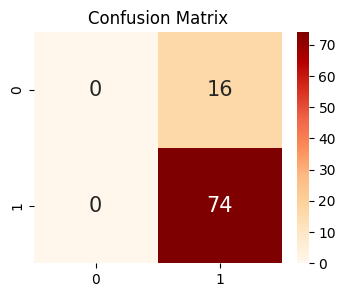

In [254]:
# confusion matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()



In [257]:
# positive_random_idx = dt[dt['y']==1].sample(50, random_state=12).index.tolist()
# negative_random_idx = dt[dt['y']==0].sample(50, random_state=12).index.tolist()

In [ ]:
# random_idx = positive_random_idx + negative_random_idx
# x = tf_idf_vect[random_idx]
# y = df['y'][random_idx]
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [258]:
lr.coef_

array([[ 0.        ,  0.10253926, -0.59668724, -0.24743749,  0.02542543,
        -0.0965982 ,  0.03846466,  0.12706937, -0.40109115,  0.07420059,
        -0.1444819 , -0.19413965, -0.1708359 ,  0.12706937,  0.        ,
         0.        , -0.24489294,  0.03017738, -0.79636789,  0.05888542,
        -0.13400026,  0.08218134,  0.06102234,  0.07931866, -0.11341488,
        -0.31382027,  0.1160768 , -0.11341488, -0.36804469,  0.        ,
        -0.29425896,  0.        ,  0.        , -0.13400026,  0.        ,
         0.        ,  0.04338004,  0.04937688, -0.32006379,  0.02542543,
         0.02542543, -0.11341488, -0.12244647,  0.05225399,  0.06112472,
         0.03924257,  0.03574253,  0.17969928, -0.21570896,  0.06161317,
         0.12706937, -0.20115768, -0.12496088, -1.20926024, -0.29054938,
         0.03431246, -0.64177025, -0.1708359 ,  0.        ,  0.        ,
         0.1309455 ,  0.        , -0.29425896, -0.11341488,  0.07371916,
        -0.06426321,  0.09079184,  0.03236034,  0.0

<BarContainer object of 520 artists>

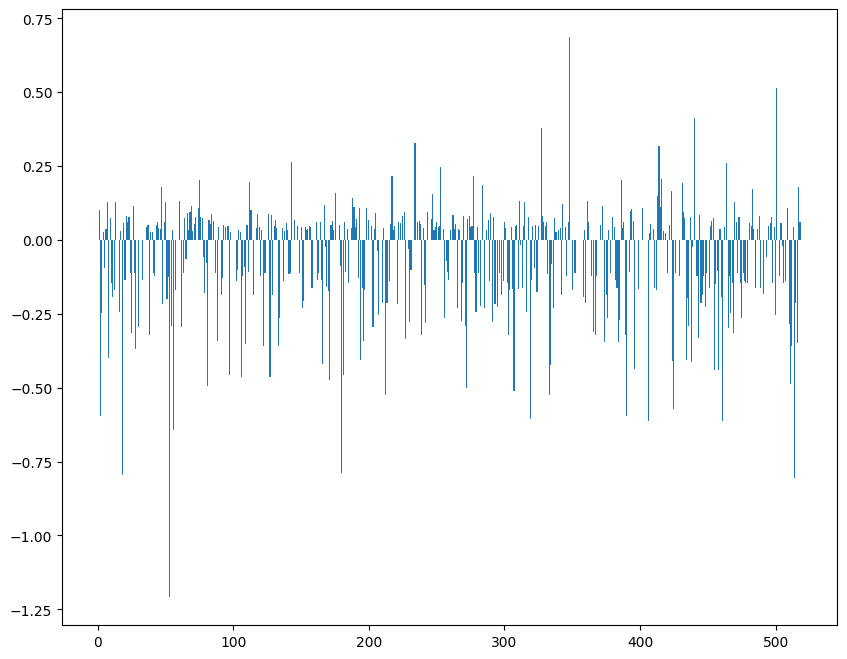

In [259]:
# print logistic regression's coef

plt.figure(figsize=(10, 8))
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])


In [260]:
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)[-5:])
# enumerate: 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환함

[(0.6858563202547445, 348), (0.5131427718489758, 501), (0.4125100369180116, 440), (0.3796641938500868, 327), (0.32883206819430727, 234)]
[(-0.6417702490306496, 56), (-0.7890165687943386, 180), (-0.7963678860918754, 18), (-0.8051553397950745, 514), (-1.2092602385753008, 53)]


In [261]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = False)
coef_pos_index


[(0.6858563202547445, 348),
 (0.5131427718489758, 501),
 (0.4125100369180116, 440),
 (0.3796641938500868, 327),
 (0.32883206819430727, 234),
 (0.31832912581550565, 414),
 (0.2623974401675759, 143),
 (0.25940086634559917, 464),
 (0.24581443068313572, 253),
 (0.21608266409467802, 277),
 (0.21472645359903897, 217),
 (0.2077825635522853, 416),
 (0.20336754888580957, 75),
 (0.20226342279947132, 386),
 (0.19479532007162476, 112),
 (0.19205209641177828, 431),
 (0.18571300398581442, 284),
 (0.17969928470822943, 47),
 (0.17757666245235948, 517),
 (0.17079614199624674, 483),
 (0.1667699690547545, 423),
 (0.15938041435082403, 175),
 (0.15394042939428992, 247),
 (0.1489212420539714, 413),
 (0.1420383195383555, 188),
 (0.1329656423715364, 311),
 (0.13094549822636647, 60),
 (0.13025201796271765, 361),
 (0.12706937153951772, 470),
 (0.12706937153951772, 315),
 (0.12706937153951772, 50),
 (0.12706937153951772, 13),
 (0.12706937153951772, 7),
 (0.12171973895619834, 343),
 (0.11805035711718019, 167),
 (

In [262]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer

{514: '화장실',
 509: '협소',
 402: '제외',
 396: '정말',
 343: '이비',
 136: '명동',
 327: '위치',
 442: '최상',
 257: '시설',
 16: '개선',
 227: '샤워',
 195: '부스',
 493: '플라스틱',
 120: '마치',
 503: '해수욕장',
 364: '임시',
 466: '케이블',
 28: '고객',
 230: '서비스',
 429: '차원',
 42: '교체',
 206: '비용',
 242: '손해',
 316: '요즘',
 141: '모텔',
 79: '느낌',
 107: '런가',
 346: '이왕이면',
 78: '넷플릭스',
 258: '시스템',
 312: '외국인',
 168: '방문',
 510: '협소해',
 406: '조금',
 392: '접근성',
 56: '근처',
 207: '비즈니스',
 226: '생각',
 19: '거리',
 423: '지하철역',
 175: '백화점',
 494: '플라자',
 180: '별로',
 501: '항상',
 452: '친구',
 321: '욕탕',
 348: '이용',
 482: '파자마',
 483: '패키지',
 130: '맥주',
 434: '청결',
 151: '물때',
 285: '여기저기',
 336: '의아',
 194: '부분',
 143: '무난',
 292: '연말',
 408: '조식',
 171: '방이',
 456: '칫솔',
 363: '일회용품',
 272: '아침',
 410: '종류',
 144: '무료',
 394: '정도',
 356: '인테리어',
 65: '나름',
 414: '주차',
 109: '로비',
 262: '신세계',
 188: '본점',
 184: '보이',
 112: '롯데',
 471: '크리스마스',
 464: '컨디션',
 129: '매우',
 6: '가습기',
 155: '미리',
 263: '신청',
 455: '침대',
 487: '편입',
 14

In [263]:
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

이용 0.6858563202547445
항상 0.5131427718489758
최고 0.4125100369180116
위치 0.3796641938500868
성비 0.32883206819430727
주차 0.31832912581550565
무난 0.2623974401675759
컨디션 0.25940086634559917
시간 0.24581443068313572
약간 0.21608266409467802
사우나 0.21472645359903897
주차장 0.2077825635522853
냄새 0.20336754888580957
전체 0.20226342279947132
롯데 0.19479532007162476
창문 0.19205209641177828
여기 0.18571300398581442
구역 0.17969928470822943
환기 0.17757666245235948
패키지 0.17079614199624674


In [264]:
for coef in coef_neg_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

그냥 -1.2092602385753008
화장실 -0.8051553397950745
객실 -0.7963678860918754
별로 -0.7890165687943386
근처 -0.6417702490306496
캡슐호텔 -0.6130150330025967
조금 -0.6119310846145504
욕실 -0.6064784617097548
가격 -0.596687240180879
절차 -0.5966203390266809
진짜 -0.5708738204287268
사람 -0.526220645455285
음식 -0.52588260817669
온도 -0.511543816108825
아침 -0.501558427880755
다만 -0.49342219751850896
호캉스 -0.4858642901338051
방이 -0.47245046557786996
매니저 -0.46538650213250904
라시 -0.46459863559895237


# Final

## 리뷰 길이 다시 자르기 
1. 리뷰 길이 300 이상 리뷰 다시 문장 분리 실행
    - 1423 개
    - 반복리뷰 제거하기 위해 `drop_duplicate(['ht_id','date','review'])`
    - 원래 데이터(838170)
    - 분리 후 데이터(846828)


2. 카테고리 포함 리뷰는 5자 이하로 자르고/ 카테고리 포함안된 리뷰는 10자 이하로 자르기

In [6]:
import pandas as pd
from kss import split_sentences

In [3]:
df = pd.read_csv('./리뷰_전체_라벨링없음.csv').drop(columns=['Unnamed: 0','season','month'])
print(df.shape[0])
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
print(df.shape[0])

838171
838170


341 -> 340 으로 리뷰 옮기기 

In [4]:
df[df['ht_id']==341]

,ht_id,date,star,review
826057,341,2023.02.21,6.0,하루 정도는 잘 거 같아 요담부턴 그 가격으로 다른 곳 갈 거지만
826058,341,2023.02.20,10.0,너무너무 좋음
826059,341,2023.02.20,6.0,4성급이라기에는 뭔가 부족한 느낌을 받았네요
826060,341,2023.02.20,8.0,인포가 약간 불 친절하다
826061,341,2023.02.19,10.0,밤에 부근 클럽 소리가 들리긴 했지만 전반적으로 좋았습니다
...,...,...,...,...
826385,341,2022.07.04,10.0,로비에서부터 4성만큼의 시설은 기대하기 힘들었지만 나름 만족했습니다
826386,341,2022.07.04,10.0,면도기야 그렇다 쳐도 칫솔 치약을 너무 비싸게 파시는 것 같아 아쉽습니다
826387,341,2022.07.04,10.0,이외에는 만족합니다
826388,341,2022.07.04,10.0,호캉스로는 괜찮네요


In [6]:
df[df['ht_id']==340]

,ht_id,date,star,review
86667,340,2023.01.30,6.0,고객 대응
86668,340,2022.12.25,9.0,넓고 편안한 방 다양한 부속시설 이용 구성비 높은 숙박 경험이었음
86669,340,2022.11.03,5.0,같은 아이디로 룸을 2개를 예약했는데 제대로 확인도 안 하시고 룸이 하나만 예약되...
86670,340,2022.11.03,5.0,그리고 아이스버킷도 3번을 요청을 하는데 대답만 하시고 30 40분을 기다려도 안 ...
86671,340,2022.11.03,5.0,직원이 둘뿐이라 그렇다고 말씀하시니 솔직히 숙소가 자체가 나쁜 건 아닌데 정말 ...
...,...,...,...,...
658055,340,2022-06-27,10.0,룸서비스로 파전 시켜 먹었는데 존 만 항상 잘 가고 있어요
658056,340,2022-06-27,10.0,너무 친절하시고 주차장이 넓어서 좋아요
658057,340,2022-06-27,10.0,룸서비스로 파전 시켜 먹었는데 존 만 항상 잘 가고 있어요
658058,340,2022-06-27,10.0,너무 친절하시고 주차장이 넓어서 좋아요


In [18]:
df['length'] = df['review'].str.len()
df['length'] = df['length'].astype(int)

In [55]:
df.sort_values('date',ascending=False)

,ht_id,date,star,review,length
71607,289,2023.02.23,8.0,직원 응대 더딤,8
5423,20,2023.02.23,9.0,교통 편리하고 내부 시설이 좋았어요,19
30386,85,2023.02.23,5.0,그리고 옆방 문 열고 닫는 소리 등이 들렸습니다,26
30385,85,2023.02.23,5.0,생각보다 방이 좁고 방에 거울이나 화장대가 없어서 좀 불편했습니다,36
30373,85,2023.02.23,5.0,위치가 좋아 접근성이 용이했습니다,18
...,...,...,...,...,...
562095,290,2016-02-27,7.8,또 체크인이 17층이라 불편한 점이 있고 베이커리와 같은 각종 편의시설이 부족해서 ...,62
562094,290,2016-02-27,7.8,명색이 특급호텔인데 방이 너무 좁아요,20
562093,290,2016-02-27,10.0,깔끔하고 좋았습니다,10
562092,290,2016-02-27,5.6,조식 가격이 25000 정도 싸지 않은 가격이지만 전 깔끔하고 종류도 여러 가지 만...,76


In [36]:
df[df['review'].str.contains('재방문')].value_counts('ht_id')

ht_id
265    146
328    125
254    122
325    101
181     99
      ... 
177      1
193      1
197      1
326      1
305      1
Length: 351, dtype: int64

In [41]:
df[df['review'].str.contains('룸컨디션')]

,ht_id,date,star,review
43689,144,2023.01.20,10.0,위치뷰어메니티욕실조식룸컨디션 수영장은 다음에 와서 꼭 이용해봐야겠어요
106129,19,2022-02-27,10.0,룸컨디션도 괜찮고 전체적으로 깔끔해서 지내기 좋아요
106282,19,2022-02-27,10.0,룸컨디션과 위치는 모두 만족했고요 지하철역과 3분 거리 소음도 없고 어메니티도 완벽합니다
121300,30,2022-11-27,8.0,7만 원짜리 22시 입실 룸컨디션은조앗어요
122239,30,2022-11-27,8.0,7만 원짜리 22시 입실 룸컨디션은조앗어요
...,...,...,...,...
738094,379,2023-01-27,10.0,믿고 오는 곳룸컨디션 최상이고 너무 깔끔해요
739065,379,2023-01-27,10.0,믿고 오는 곳룸컨디션 최상이고 너무 깔끔해요
743331,381,2023-02-26,10.0,스탠다드 룸컨디션이 각각 다른거 같아요오래된 이불커버 또는 타올이 있는 방으로 배정...
829294,352,2022.10.03,10.0,가격 대비 정말 훌륭한 룸컨디션리었어요


In [24]:
df = df[df['length']>2]
df.reset_index(drop=True, inplace=True)

In [35]:
for i in range(100,df['length'].max()-100,100):
    print(f'리뷰 길이 {i} : {df[(df["length"]>=i) & (df["length"] < i+100)].shape[0]}')

리뷰 길이 100 : 18797
리뷰 길이 200 : 4832
리뷰 길이 300 : 747
리뷰 길이 400 : 316
리뷰 길이 500 : 151
리뷰 길이 600 : 72
리뷰 길이 700 : 47
리뷰 길이 800 : 25
리뷰 길이 900 : 17
리뷰 길이 1000 : 18
리뷰 길이 1100 : 11
리뷰 길이 1200 : 3
리뷰 길이 1300 : 4
리뷰 길이 1400 : 1
리뷰 길이 1500 : 3
리뷰 길이 1600 : 2
리뷰 길이 1700 : 2
리뷰 길이 1800 : 0
리뷰 길이 1900 : 0
리뷰 길이 2000 : 0
리뷰 길이 2100 : 1
리뷰 길이 2200 : 0
리뷰 길이 2300 : 1
리뷰 길이 2400 : 0
리뷰 길이 2500 : 0
리뷰 길이 2600 : 0
리뷰 길이 2700 : 0
리뷰 길이 2800 : 0
리뷰 길이 2900 : 0
리뷰 길이 3000 : 0
리뷰 길이 3100 : 0
리뷰 길이 3200 : 0
리뷰 길이 3300 : 0
리뷰 길이 3400 : 0
리뷰 길이 3500 : 0
리뷰 길이 3600 : 0
리뷰 길이 3700 : 0
리뷰 길이 3800 : 0
리뷰 길이 3900 : 0
리뷰 길이 4000 : 0
리뷰 길이 4100 : 0
리뷰 길이 4200 : 1
리뷰 길이 4300 : 0
리뷰 길이 4400 : 0
리뷰 길이 4500 : 0
리뷰 길이 4600 : 0
리뷰 길이 4700 : 0
리뷰 길이 4800 : 0
리뷰 길이 4900 : 0
리뷰 길이 5000 : 0
리뷰 길이 5100 : 0
리뷰 길이 5200 : 0
리뷰 길이 5300 : 0
리뷰 길이 5400 : 0
리뷰 길이 5500 : 0
리뷰 길이 5600 : 0
리뷰 길이 5700 : 0
리뷰 길이 5800 : 0
리뷰 길이 5900 : 0
리뷰 길이 6000 : 0
리뷰 길이 6100 : 0
리뷰 길이 6200 : 0


In [47]:
need_cut_50 = df[(df['length']>=50) & (df['length']<80)].sort_values('length',ascending=False)
need_cut_100 = df[(df['length']>=100) & (df['length']<1001)].sort_values('length',ascending=False)
need_cut_1000 = df[(df['length']>=1000)].sort_values('length',ascending=False)

In [91]:
need_cut = df[df['length']>=300].sort_values('length')
need_cut

,ht_id,date,star,review,length
658131,346,2022-02-27,9.6,여자친구와 첫 명동 여행에 마무리까지 좋았으면 하는 마음에서 이 호텔로 결정했습니다...,300
639118,334,2022-02-27,9.3,지난 26일 금요일 인근에 일정이있어서 적당한 숙소를 찾아보던 중 예약하게되었습니다...,300
546982,286,2021-02-27,10.0,신설호텔이라 그런지 시설깨끗하고 좋습니다조식도 먹을만했구요위치도 신세계백화점과 숭례...,300
612561,322,2022-02-27,10.0,명동쪽 숙소 중에 여기만큼 후기나 내부 깔끔한 곳이 없어서 바로 예약 했어요생각보다...,300
259005,130,2022-04-27,10.0,네고 왕 캠페인으로 찾은 웨스틴 조선 서울 총 웨스틴 클럽에서 3번 식사와 델리 쿠...,300
...,...,...,...,...,...
557698,289,2022-09-27,10.0,여자친구와 1주넌 기념으로 콘래드 호텔에서 1박 2일 호캉스 즐기다 왔습니다 패키지...,1773
733791,379,2023-01-27,8.6,까치산에서 제일 좋은 모텔 굿굿 지하철역 가까워요고데기 충전기 신분증 맡기고 빌려야...,2135
512221,271,2021-02-27,7.3,토미호스텔 2021 2월6일 입실 ...,2347
456231,247,2021-02-27,9.6,3줄 중요 포인트 요약 서울의 미니어처 지구촌 이태원 바로 옆과 꼼데가르송 거리에 ...,4207


In [102]:
cut_idx = list(need_cut.index)
df.drop(index=cut_idx,inplace=True)
df.reset_index(drop=True, inplace=True)
df[df['length']>=300]

,ht_id,date,star,review,length


In [103]:
df

,ht_id,date,star,review,length
0,2,2023.02.12,5.0,이 정도 방 컨디션이면 1박당 1만 원 정도 저렴해도 되겠습니다,35
1,2,2023.02.11,8.0,위치가 정말 좋고 가격도 저렴하다,18
2,2,2023.02.06,6.0,위치가 너무 좋았습니다,12
3,2,2023.02.06,6.0,명동 중심부에 있어서 쇼핑하기도 편리하고 식당도 많아서 관광하기 좋았습니다,41
4,2,2023.01.30,9.0,명동시내와 가깝고 주변에 편의시설이 잘 되어있어 구성비 좋은 호텔입니다,39
...,...,...,...,...,...
833644,386,2022.02.22,10.0,로비의 힐튼 향수가 강했지만 그거 빼고는 정말 좋았어요,30
833645,386,2022.02.22,10.0,세이프 스티커가 접착력이 강한 거도 조금 단점이지만 숙박에는 문제없이 좋았습니다,44
833646,386,2022.02.21,10.0,프런트 직원들 친절하고 침구 푹신하고 따뜻하게 잤어요,29
833647,386,2022.02.21,10.0,창문 열 수 있어서 좋았어요,15


In [98]:
idx = 0
test = pd.DataFrame({'ht_id':[],'date':[],'star':[],'review':[]})


for i in (range(tqdm(need_cut.shape[0]))):
    try : 
        sent = split_sentences(need_cut.iloc[i,3])
        if len(sent) != 1 :
            for s in sent:
                need_cut1 = pd.DataFrame({'ht_id':need_cut.iloc[i,0],'date':need_cut.iloc[i,1],'star':need_cut.iloc[i,2],'review':s},index=[idx])
                idx += 1
                test = pd.concat([test,need_cut1])
        else:
            need_cut1 = pd.DataFrame({'ht_id':need_cut.iloc[i,0],'date':need_cut.iloc[i,1],'star':need_cut.iloc[i,2],'review':sent},index=[idx])
            idx += 1
            test = pd.concat([test,need_cut1])
    except :
        pass
    test['review']=test['review'].astype('str')
    test = test[['ht_id','date','star','review']]
    test.reset_index(drop=True,inplace=True)
    test['ht_id'] = test['ht_id'].astype(int)

100%|██████████| 1423/1423 [49:07<00:00,  2.07s/it] 


In [104]:
test['length'] = test['review'].str.len()

In [106]:
test.sort_values('length',ascending=False)

,ht_id,date,star,review,length
15539,366,2022-02-27,10.0,두유두유두유두유두유두유두유두유두유두유두유두유두유두유두유두유두유두유두유두유두유두유두유...,6298
14796,270,2022-09-27,10.0,최고최고 최고최고최고최고최고최고최고최고최고최고최고최고최고최고최고최고최고최고최고최고최...,1195
14765,270,2022-09-27,10.0,최고최고최고최고최고최고최고최고최고최고최고최고최고최고최고최고최고최고최고최고최고최고최고...,1188
14529,349,2022-10-27,10.0,카카오가 입주한 경기도 판교의 데이터센터 화재와 관련해 의 카카오에 대한 배상...,1108
14499,380,2023-02-25,10.0,깔끔함깔끔함깔끔함깔끔함깔끔함깔끔함깔끔함깔끔함깔끔함깔끔함깔끔함깔끔함깔끔함깔끔함깔끔함깔...,1073
...,...,...,...,...,...
13758,377,2022-10-27,10.0,0,1
7793,283,2022-09-27,10.0,끝,1
6610,336,2022-07-27,1.0,휴,1
13978,379,2023-01-27,10.0,잉,1


In [111]:
test2 = test[(test['length']<1000) & (test['length']>3)]
test2

,ht_id,date,star,review,length
0,346,2022-02-27,9.6,여자친구와 첫 명동 여행에 마무리까지 좋았으면 하는 마음에서 이 호텔로 결정했습니다,46
1,346,2022-02-27,9.6,들어서자마자 로비의 직원분들이 반겨주셨고 깔끔한 로비 인테리어로 기분이 좋아졌습니다,46
2,346,2022-02-27,9.6,무엇보다 시설이 좋았고 청결상태가 마음에 들었습니다,28
3,346,2022-02-27,9.6,저녁 9시에 가서 그런지 루프탑은 많이 추웠지만 실내의 난로를 1시간만 이용하는 저...,83
4,346,2022-02-27,9.6,굳이 아쉬웠던 점을 생각해보자면 다소 약한 수압과 따뜻하기 보단 미지근한 물 때문에...,71
...,...,...,...,...,...
15534,247,2021-02-27,9.6,다만 초밥은 없으니 참고하자사진 9 10 호텔의 디자인과 오브제호텔에는 여러가지 조...,225
15535,247,2021-02-27,9.6,아무래도 누군가 부지런하게 기상정보를 쓰고 있나 보다 참고 여기 호텔의 디자인이 거...,96
15536,247,2021-02-27,9.6,그래도 머리 속에 많은 것을 담고 가니 기억에 많이 남을 호텔로 될것 같다,41
15537,366,2022-02-27,10.0,잘쉬었다가요,6


In [114]:
test2.drop_duplicates(['ht_id','date','review'],inplace=True)
test2.reset_index(drop=True, inplace=True)

In [125]:
dr_idx2 = [637]
# dr_idx2 = [8672,6021,4612]
test2.drop(index=dr_idx2,inplace=True)
test2.reset_index(drop=True, inplace=True)

In [127]:
# test2[test2['length']>200].to_excel('./리뷰점검.xlsx',index=False)

In [133]:
df3 = pd.concat([df,test2]).sort_values('ht_id').reset_index(drop=True)

In [134]:
df3

,ht_id,date,star,review,length
0,1,2021.08.01,8.0,위치며 청결함이며 친절함 무엇 하나 부족함 없음,26
1,1,2019-02-27,10.0,난방도 너무 잘되고 너무 잘 쉴 수 있어서 꼬인 일정과 추운 날씨에 속상했던 ...,52
2,1,2019-02-27,10.0,조식도 기대되네요,9
3,1,2019-02-27,10.0,룸 업그레이드해주셔서 너무 편안하게 잘 지낼 수 있어서 감사해요,35
4,1,2019-02-27,10.0,직원분의 친절한 설명과 룸 청결상태와 침구 상태가 좋아서 낯선 곳의 하룻밤이 즐겁네요,49
...,...,...,...,...,...
846823,386,2022.07.11,10.0,굳입미다,4
846824,386,2022.07.11,10.0,맨 처음에는 주차가 어렵다고 생각했지만 발레파킹도 잘 도와주시고 시설과 직원분들의 ...,62
846825,386,2022.07.08,10.0,신축에 다 좋은데 세면대가 불편했어요,20
846826,386,2022.06.26,10.0,객실이 좋아요,7


In [140]:
dr_idx3 = [527323,527322,381464,492586]
df3.drop(index=dr_idx3,inplace=True)
df3.reset_index(drop=True, inplace=True)

In [145]:
df3

,ht_id,date,star,review,length
0,1,2021.08.01,8.0,위치며 청결함이며 친절함 무엇 하나 부족함 없음,26
1,1,2019-02-27,10.0,난방도 너무 잘되고 너무 잘 쉴 수 있어서 꼬인 일정과 추운 날씨에 속상했던 ...,52
2,1,2019-02-27,10.0,조식도 기대되네요,9
3,1,2019-02-27,10.0,룸 업그레이드해주셔서 너무 편안하게 잘 지낼 수 있어서 감사해요,35
4,1,2019-02-27,10.0,직원분의 친절한 설명과 룸 청결상태와 침구 상태가 좋아서 낯선 곳의 하룻밤이 즐겁네요,49
...,...,...,...,...,...
846819,386,2022.07.11,10.0,굳입미다,4
846820,386,2022.07.11,10.0,맨 처음에는 주차가 어렵다고 생각했지만 발레파킹도 잘 도와주시고 시설과 직원분들의 ...,62
846821,386,2022.07.08,10.0,신축에 다 좋은데 세면대가 불편했어요,20
846822,386,2022.06.26,10.0,객실이 좋아요,7


In [141]:
df3.sort_values('length').tail(50)

,ht_id,date,star,review,length
215924,116,2023.02.04,2.0,1 방 온도 입실했을 때 20도였고 너무 추워서 얼른 온도 올렸는데 이용 시간 끝날...,337
527075,261,2022.11.30,9.0,호텔 숙박비에 조식이 포함되어 있었는데 조선 팰리스의 조식은 꽤 유명한지 돈을 내...,338
552510,271,2023-01-27,10.0,서울 수도권에 갈 일이 있다편안따뜻한 숙소를 찾고 있다1 혼자9시이전 체크인 예정...,339
693714,325,2022-10-27,1.0,근데 차액금은 내줄 수 없다고 함4 차액금의 문제는 윗사람들이 의논해야 할 문제라며...,340
748807,348,2023.01.08,8.0,무엇보다 욕실 코너 모서리 실리콘에 곰팡이 자국 안 보여서 돔 천장 물 얼룩 정도는...,342
760340,352,2022-10-27,9.3,여의도불꽃축제 기간이라 서울시내 전반적으로 숙소가 두배 이상 비쌌으나 1박에 13만...,344
429830,222,2022.03.21,2.0,디너 이용 때문에 갔는데 식당에 커피 머신 있어서 그냥 구경하고 있는데 여자 매니저...,344
219334,118,2022-11-27,5.0,예약할 때 사진 처음 화면에 넷플릭스가 바로 보여서 넷플릭스가 가능한 숙소인 줄 알...,352
748824,348,2022-10-27,3.3,집에 일이있어서 급하게 예약했던대로 그럭저럭 잘 지내다 옴장점1편안한 침대2 로비옆...,352
552300,271,2023-01-27,10.0,서울 수도권에 갈 일이 있다 편안 따뜻한 숙소를 찾고 있다 1 혼자 9시 이전 체...,354


In [152]:
save = df3.sort_values(['ht_id','date']).reset_index(drop=True)
save.drop(columns='length').to_csv('./리뷰_전체_라벨링없음2.csv',index=False)

### 3월 24일

In [40]:
import pandas as pd
df = pd.read_csv('./리뷰_전체_라벨링없음2.csv')
df['length'] = df['review'].str.len()
df.shape

(846824, 5)

In [41]:
df2 = df[(df['length']>=10) & (df['length'] <=200)]
print(df2.shape)

(726115, 5)


In [42]:
df2 = df2.drop_duplicates(['ht_id','date','star','review'])
print(df2.shape)
df3 = df2[~df2['review'].str.contains('코로나')]
df3.reset_index(drop=True, inplace=True)
df3.shape

(399399, 5)


(396904, 5)

In [9]:
df3.to_csv('리뷰_전체.csv',index=False)

<AxesSubplot: >

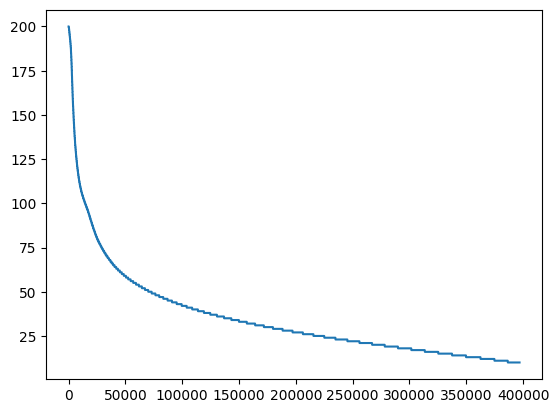

In [10]:
pl = df3.sort_values('length',ascending=False).reset_index(drop=True)
pl['length'].plot()

In [53]:
df[(df['review'].str.contains('재방문'))&(df['review'].str.contains('없'))].value_counts('ht_id')

ht_id
367    20
307    19
334    16
357    14
325    14
       ..
312     1
316     1
321     1
324     1
379     1
Length: 217, dtype: int64

## 라벨링할거

In [61]:
import pandas as pd

In [63]:
df = pd.read_csv('./리뷰_전체.csv')#.drop(columns='length')
df

,ht_id,date,star,review
0,1,2019-02-27,10.0,난방도 너무 잘되고 너무 잘 쉴 수 있어서 꼬인 일정과 추운 날씨에 속상했던 ...
1,1,2019-02-27,10.0,룸 업그레이드해주셔서 너무 편안하게 잘 지낼 수 있어서 감사해요
2,1,2019-02-27,10.0,직원분의 친절한 설명과 룸 청결상태와 침구 상태가 좋아서 낯선 곳의 하룻밤이 즐겁네요
3,1,2019-02-27,10.0,일정이 꼬여서 급하게 입실하게 됐는데 역이나 공항을 이용하기 편한 위치여서 너무 좋네요
4,1,2019-02-27,6.3,그리고 밖에 덕수궁 있어서 좋아요
...,...,...,...,...
396899,386,2023.02.19,6.0,호캉스는 호텔에 둘러볼게 많아야 하는데 그건 없어요
396900,386,2023.02.19,6.0,시내권에 있고 깨끗하다는 것만
396901,386,2023.02.19,10.0,양재역 근처에 위치해있어 역과 가까웠고 호텔은 깨끗했어요
396902,386,2023.02.19,10.0,호텔 방 바로 앞에 공사를 하고 있어서 뷰는 그렇게 좋지 않았어요


In [47]:
df[df['ht_id']==340]

,ht_id,date,star,review
349475,340,2020.02.24,8.0,천장에 뭔가 껴 있는 게 많았어요
349476,340,2020.02.25,8.0,오래된 호텔치고 시설이 깨끗합니다
349477,340,2020.02.25,8.0,집하고 가까워서 친구들과 자주 이용합니다
349478,340,2020.02.26,8.0,방은 자는 용도 오는 구성비 좋다고 생각합니다
349479,340,2020.02.26,8.0,침대 푹신푹신하고 좋았어요
...,...,...,...,...
350762,340,2023-02-26,10.0,청담역과 가까운 위치에 있고 주변에 맛집들도 꽤 있어서 이용하는데 불편함이 전혀 없...
350763,340,2023-02-26,10.0,호텔 직원들 친절합니다 특히 엘레베이터 편하고 빠르게 움직이고객실 침구류도 좋습니다...
350764,340,2023-02-26,6.0,침대가 좋아서 잠은 잘잤습니다 그런데 드라이기 고장에 다른 드라이기가져다주신게 켜는...
350765,340,2023-02-26,8.6,서울에 교워이 있어서 3개월만에 다시방문한 리베라호텔주차는 지하에 해도 되고지상주차...


In [53]:
df[df['ht_id']==341]

,ht_id,date,star,review
350767,341,340,10.0,직원분들이 너무 친절하셔서 너무 좋았습니다
350768,341,340,10.0,로비에서부터 4성만큼의 시설은 기대하기 힘들었지만 나름 만족했습니다
350769,341,340,10.0,면도기야 그렇다 쳐도 칫솔 치약을 너무 비싸게 파시는 것 같아 아쉽습니다
350770,341,340,10.0,이외에는 만족합니다
350771,341,340,10.0,호캉스로는 괜찮네요
...,...,...,...,...
351067,341,340,8.0,위치 대비 구성비가 괜찮아 보입니다
351068,341,340,8.0,주차장 내려갈 때 조심해야 해요
351069,341,340,6.0,4성급이라기에는 뭔가 부족한 느낌을 받았네요
351070,341,340,8.0,인포가 약간 불 친절하다


In [56]:
idx = list(df[df['ht_id']==341].index)
df.iloc[idx,0] = 340

In [59]:
df.to_csv('./리뷰_전체.csv',index=False)

In [44]:
import random

In [45]:
for_label = df.sample(frac=1,random_state=10000)
for_label.head(10)

,ht_id,date,star,review
392583,377,2022.12.25,4.0,그런데 같은 가격대에서 객실 화장실 크기나 입실 시간 등을 고려하고서도 이곳을 선택...
51684,50,2022.10.04,8.0,욕실이 좀 작긴 했지만 전반적으로 괜찮았어요
328259,321,2020.06.21,10.0,스태프분도 친절하셨어요
124949,123,2022.11.11,2.0,위층에서 움직일 때마다 건식 세면대 공간이 퉁퉁거리면서 소리가 엄청 울려서 귀가 따...
150018,149,2022.12.03,10.0,놀러 가시는 분들께는 정말 이 가격에 강추인데 비즈니스라면 이동거리 고려하시면 좋겠습니다
91086,86,2023.01.28,10.0,친절하고 모든 시설 청결합니다
179002,172,2022-09-27,10.0,넷플릭스 잘 나오는 숙소
181090,175,2022-08-27,3.0,좀 일찍 오면 다른 곳에 주차해야 됨
82785,80,2022-07-27,9.3,데이 유스 주차 무료고 어메니티에 치약 칫솔 포함돼있습니다
245208,246,2021.10.26,8.0,객실도 청결하고 서비스도 좋았습니다


In [31]:
for_label2 = for_label.iloc[:10000,:]
for_label2['label'] = 0

In [37]:
for i in range(0,7501,2500):
    df = for_label2.iloc[i:i+2500,:]
    df.to_csv(f'{i+2500}.csv',index=False)
    